In [2]:
import torch
import pandas as pd
import numpy as np
from torchvision.io import read_image
from torchvision.utils import save_image
import os
from PIL import Image
def convert_tensor_to_image(tensor):
    image = tensor.permute(1, 2, 0)
    return image

In [3]:
if torch.cuda.is_available():
  device = "cuda"
else:
    device = "cpu"

In [4]:
def gta2cityscapesLabels(rgb, labels):
  #arr = np.zeros(rgb.shape[:2],dtype=np.int32) ## rgb shape: (h,w,3); arr shape: (h,w)
    rgb=rgb.permute(1,2,0)
    arr_torch=torch.ones(rgb.to(device).shape[:2],dtype=torch.int8).to(device)*255
    for label in labels:
        encoding_gta=label[1]
        encoding_cityscapes=label[2]
        arr_torch[torch.all(rgb[:,:,:].to(device) == encoding_gta, axis=-1)] = encoding_cityscapes #1 = 'id'
    return arr_torch


In [5]:
from collections import namedtuple
Label = namedtuple('Label',
['name','id','trainId','category',
'categoryId','hasInstances',
'ignoreInEval','color',])
labels = [
    Label(  'road'                 ,  7 ,        0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'building'             , 11 ,        2 , 'construction'    , 2       , False        , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'pole'                 , 17 ,        5 , 'object'          , 3       , False        , False        , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        6 , 'object'          , 3       , False        , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        7 , 'object'          , 3       , False        , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,       10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,       11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,       12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,       13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,       14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,       15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'train'                , 31 ,       16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,       17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,       18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) )]

In [8]:
!mkdir -p dataset
!unzip -n /content/drive/MyDrive/Cityscapes.zip -d dataset/cityscapes
!unzip -n /content/drive/MyDrive/GTA5.zip -d dataset/GTA5
!mkdir -p /content/dataset/GTA5/GTA5/labels_correct

Output streaming troncato alle ultime 5000 righe.
  inflating: dataset/GTA5/GTA5/images/00002.png  
  inflating: dataset/GTA5/GTA5/images/00003.png  
  inflating: dataset/GTA5/GTA5/images/00004.png  
  inflating: dataset/GTA5/GTA5/images/00005.png  
  inflating: dataset/GTA5/GTA5/images/00006.png  
  inflating: dataset/GTA5/GTA5/images/00007.png  
  inflating: dataset/GTA5/GTA5/images/00008.png  
  inflating: dataset/GTA5/GTA5/images/00009.png  
  inflating: dataset/GTA5/GTA5/images/00010.png  
  inflating: dataset/GTA5/GTA5/images/00011.png  
  inflating: dataset/GTA5/GTA5/images/00012.png  
  inflating: dataset/GTA5/GTA5/images/00013.png  
  inflating: dataset/GTA5/GTA5/images/00014.png  
  inflating: dataset/GTA5/GTA5/images/00015.png  
  inflating: dataset/GTA5/GTA5/images/00016.png  
  inflating: dataset/GTA5/GTA5/images/00017.png  
  inflating: dataset/GTA5/GTA5/images/00018.png  
  inflating: dataset/GTA5/GTA5/images/00019.png  
  inflating: dataset/GTA5/GTA5/images/00020.png  


In [14]:
source_path='/content/dataset/GTA5/GTA5/labels/'
dest_path='/content/dataset/GTA5/GTA5/labels_correct/'
for source_annotation_filename in os.listdir(source_path):
    annotation = read_image(source_path+source_annotation_filename)
    annotation_correct = gta2cityscapesLabels(annotation, labels)
    im = Image.fromarray(annotation_correct.cpu().numpy().astype(np.uint8))
    dest_annotation_path = dest_path + source_annotation_filename
    im.save(dest_annotation_path)
    print(source_annotation_filename)

00705.png
00004.png
02112.png
00302.png
00858.png
01189.png
02175.png
01901.png
00479.png
01339.png
00911.png
00053.png
01982.png
01192.png
02211.png
01502.png
01600.png
01474.png
01413.png
00272.png
02489.png
01487.png
00962.png
02159.png
02010.png
00229.png
02469.png
00760.png
01258.png
00430.png
01294.png
01925.png
01500.png
00915.png
00857.png
01015.png
02212.png
00051.png
00738.png
01921.png
00947.png
01158.png
00536.png
02111.png
02446.png
01996.png
00401.png
00293.png
02040.png
02062.png
01656.png
02183.png
01749.png
01428.png
02080.png
01065.png
01007.png
00044.png
00740.png
01970.png
01436.png
00206.png
01133.png
01946.png
02030.png
01213.png
00753.png
02265.png
01237.png
00202.png
01398.png
01989.png
02236.png
00729.png
00800.png
01153.png
02259.png
01894.png
00027.png
00540.png
02226.png
00770.png
00496.png
01322.png
00099.png
00402.png
01821.png
01993.png
00678.png
00023.png
01489.png
02105.png
01113.png
01935.png
01483.png
01919.png
01906.png
01783.png
00157.png
00776.png


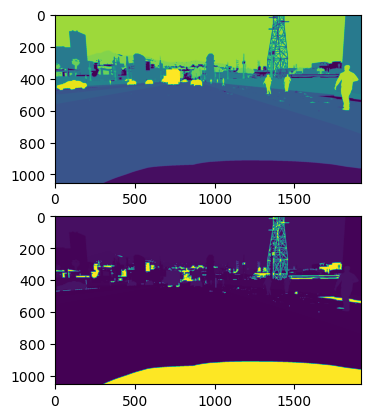

In [20]:
import matplotlib.pyplot as plt

img = read_image('dataset/GTA5/GTA5/labels/00500.png').permute(1,2,0)
img1 = read_image('dataset/GTA5/GTA5/labels_correct/00500.png').permute(1,2,0)

fig, axes = plt.subplots(2, 1)
axes[0].imshow(img)
axes[1].imshow(img1)
plt.show()
# print(img[800][1500])
# print(img1[800][1500])

In [ ]:
from shutil import make_archive
make_archive(base_name="labels_correct", base_dir='/content/dataset/GTA5/GTA5/labels_correct', format='zip')